In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('city_day.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = [d.year for d in df['Date']]
df['Month'] = [d.month for d in df['Date']]
    
df.dropna(subset = ['AQI'],inplace = True)
df = df.drop(['Xylene'],axis = 1)


In [10]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,209.0,Poor,2015,1
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor,2015,1
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,514.0,Severe,2015,1
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,782.0,Severe,2015,2
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,914.0,Severe,2015,2


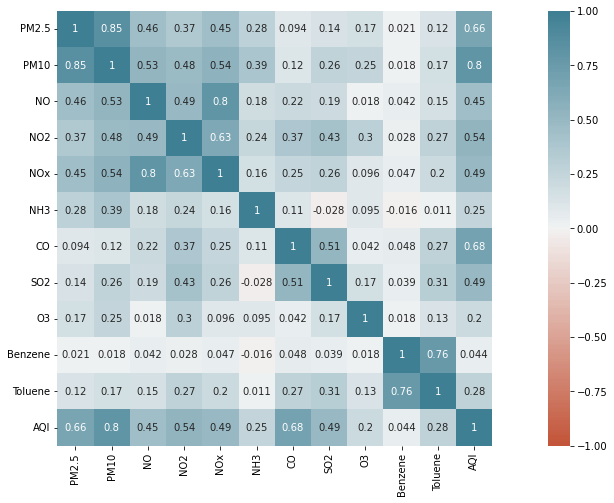

In [14]:
df_corr = df.corr()
df_corr = df_corr.drop(['Year','Month'],axis = 1)
df_corr = df_corr.drop(['Year','Month'],axis = 0)
plt.figure(figsize=(20,8))
ax = sns.heatmap( df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)


In [15]:
#List of cities for which we have the data
cities = df['City'].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [25]:
#Extracting out the data for Jaiur, delhi and guwahati
Lucknow = df[df['City'] == 'Lucknow']
Bengaluru = df[df['City'] == 'Bengaluru']
Mumbai = df[df['City'] == 'Mumbai']
Patna = df[df['City'] == 'Patna']

In [26]:
Mumbai

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
23077,Mumbai,2018-05-07,18.44,NaN,23.53,22.60,46.03,NaN,1.30,22.00,34.00,0.29,NaN,73.0,Satisfactory,2018,5
23078,Mumbai,2018-05-08,18.07,48.80,34.20,29.98,64.12,NaN,1.36,19.58,35.44,0.35,NaN,82.0,Satisfactory,2018,5
23079,Mumbai,2018-05-09,18.55,62.07,34.50,28.90,63.40,NaN,1.35,18.59,35.91,0.44,NaN,84.0,Satisfactory,2018,5
23080,Mumbai,2018-05-10,22.57,67.03,22.38,23.46,45.81,NaN,1.30,21.30,37.26,0.32,NaN,77.0,Satisfactory,2018,5
23081,Mumbai,2018-05-11,23.57,71.80,21.08,25.71,46.80,NaN,1.26,24.83,36.59,0.44,NaN,73.0,Satisfactory,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23859,Mumbai,2020-06-27,18.04,63.72,28.29,8.58,36.07,26.69,0.43,10.36,5.68,0.82,NaN,64.0,Satisfactory,2020,6
23860,Mumbai,2020-06-28,12.33,44.84,27.15,8.06,34.78,26.50,0.38,10.58,5.76,0.85,NaN,64.0,Satisfactory,2020,6
23861,Mumbai,2020-06-29,7.88,27.51,26.58,7.94,34.42,23.94,0.38,11.11,5.84,0.47,NaN,54.0,Satisfactory,2020,6
23862,Mumbai,2020-06-30,4.66,13.87,25.25,8.02,33.25,19.89,0.36,13.40,6.94,0.73,NaN,54.0,Satisfactory,2020,6


In [23]:
Bengaluru

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
4373,Bengaluru,2015-03-21,48.59,NaN,3.47,27.00,18.04,28.02,3.89,1.94,52.96,21.33,196.72,91.0,Satisfactory,2015,3
4374,Bengaluru,2015-03-22,47.38,NaN,2.84,22.39,15.33,23.19,11.29,2.05,71.85,14.97,138.20,120.0,Moderate,2015,3
4375,Bengaluru,2015-03-23,65.65,NaN,3.10,26.35,17.45,27.76,9.95,6.30,72.84,9.88,100.77,154.0,Moderate,2015,3
4376,Bengaluru,2015-03-24,60.47,NaN,5.39,29.87,20.88,35.10,1.46,6.07,64.12,5.90,61.48,119.0,Moderate,2015,3
4377,Bengaluru,2015-03-25,62.56,NaN,3.16,23.57,16.39,27.13,10.05,4.98,82.34,4.53,39.99,232.0,Poor,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,Bengaluru,2020-06-27,16.60,29.48,3.06,13.68,13.07,6.88,0.67,7.29,15.69,0.21,1.18,51.0,Satisfactory,2020,6
6299,Bengaluru,2020-06-28,20.44,26.34,2.69,10.33,10.58,6.58,0.66,6.60,17.59,0.12,0.94,61.0,Satisfactory,2020,6
6300,Bengaluru,2020-06-29,28.68,29.27,3.62,12.12,12.94,6.80,0.56,6.33,16.99,0.17,1.17,65.0,Satisfactory,2020,6
6301,Bengaluru,2020-06-30,14.47,24.26,4.61,12.69,15.00,6.82,0.56,6.45,16.08,0.18,0.86,63.0,Satisfactory,2020,6


In [20]:
Lucknow

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
19925,Lucknow,2015-03-21,518.10,NaN,8.47,25.91,4.22,NaN,2.05,10.99,59.02,2.56,3.75,607.0,Severe,2015,3
19926,Lucknow,2015-03-22,674.43,NaN,7.26,22.05,4.22,NaN,2.13,11.33,11.61,2.43,3.69,707.0,Severe,2015,3
19927,Lucknow,2015-03-23,41.71,NaN,8.14,23.95,4.47,NaN,2.33,10.59,14.01,2.40,3.38,699.0,Severe,2015,3
19928,Lucknow,2015-03-24,63.06,NaN,11.18,26.69,4.30,NaN,2.30,13.25,24.94,2.66,3.60,108.0,Moderate,2015,3
19929,Lucknow,2015-03-25,50.60,NaN,23.82,39.66,4.83,NaN,2.29,14.75,23.06,3.15,3.08,111.0,Moderate,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21850,Lucknow,2020-06-27,32.23,NaN,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,74.0,Satisfactory,2020,6
21851,Lucknow,2020-06-28,34.58,NaN,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,77.0,Satisfactory,2020,6
21852,Lucknow,2020-06-29,30.19,NaN,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,65.0,Satisfactory,2020,6
21853,Lucknow,2020-06-30,38.27,NaN,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,69.0,Satisfactory,2020,6


In [27]:
Patna

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
23988,Patna,2015-10-03,74.28,NaN,23.79,21.98,45.62,NaN,1.04,4.79,6.25,0.21,1.42,154.0,Moderate,2015,10
23989,Patna,2015-10-04,118.50,NaN,47.07,24.01,71.08,NaN,1.12,7.27,4.84,0.30,1.69,156.0,Moderate,2015,10
23990,Patna,2015-10-05,99.12,NaN,51.83,27.60,79.26,NaN,1.63,4.48,6.12,0.32,2.04,222.0,Poor,2015,10
23991,Patna,2015-10-06,107.03,NaN,50.80,22.55,72.95,NaN,1.52,5.45,8.45,0.30,1.81,257.0,Poor,2015,10
23992,Patna,2015-10-07,111.00,NaN,47.10,26.21,73.08,NaN,1.56,5.50,11.09,0.29,1.83,246.0,Poor,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,Patna,2020-06-27,17.71,63.73,9.47,23.01,22.28,1.91,0.87,3.63,23.39,1.09,3.07,65.0,Satisfactory,2020,6
25718,Patna,2020-06-28,19.27,57.42,30.19,18.13,36.76,2.05,0.72,3.92,17.37,1.18,2.90,82.0,Satisfactory,2020,6
25719,Patna,2020-06-29,17.24,42.83,42.40,20.51,47.69,2.26,0.88,3.60,17.50,1.51,4.91,88.0,Satisfactory,2020,6
25720,Patna,2020-06-30,29.76,60.68,42.12,27.50,52.04,1.59,0.83,3.91,21.70,1.58,8.59,93.0,Satisfactory,2020,6


In [28]:
Lucknow_2020 = Lucknow[Lucknow['Year'] == 2020]
Mumbai_2020 = Mumbai[Mumbai['Year'] == 2020]
Bengaluru_2020 = Bengaluru[Bengaluru['Year'] == 2020]
Patna_2020 = Patna[Patna['Year'] == 2020]

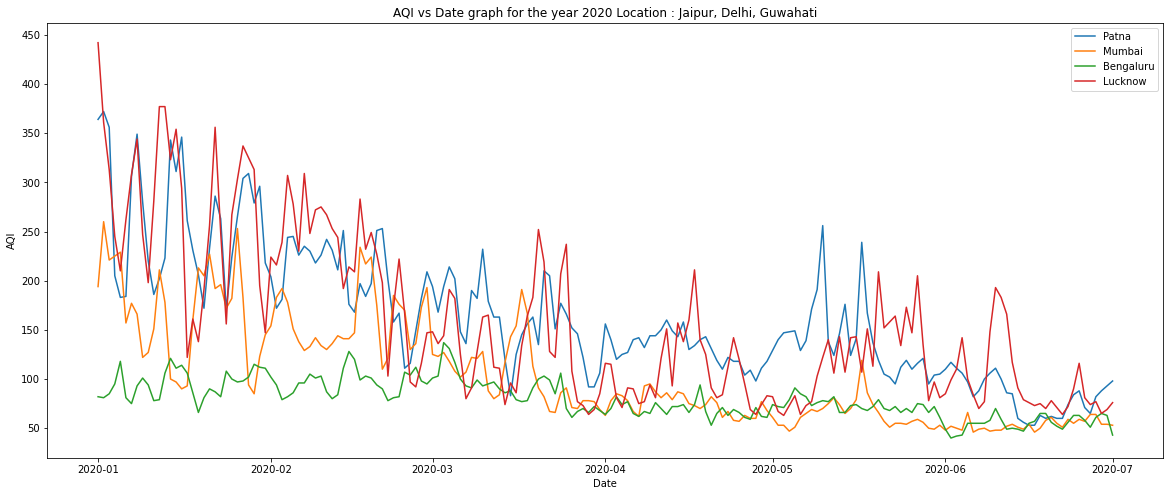

In [33]:
#Plotting the AQI vs Date graph for Jaipur, Delhi and Guwahati

plt.figure(figsize=(20,8))
plt.plot(Patna_2020['Date'],Patna_2020['AQI'])
plt.plot(Mumbai_2020['Date'],Mumbai_2020['AQI'])
plt.plot(Bengaluru_2020['Date'],Bengaluru_2020['AQI'])
plt.plot(Lucknow_2020['Date'],Lucknow_2020['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2020 Location : Jaipur, Delhi, Guwahati")
plt.legend(["Patna", "Mumbai","Bengaluru","Lucknow"])

In [34]:
Lucknow_2019 = Lucknow[Lucknow['Year'] == 2019]
Mumbai_2019 = Mumbai[Mumbai['Year'] == 2019]
Bengaluru_2019 = Bengaluru[Bengaluru['Year'] == 2019]
Patna_2019 = Patna[Patna['Year'] == 2019]

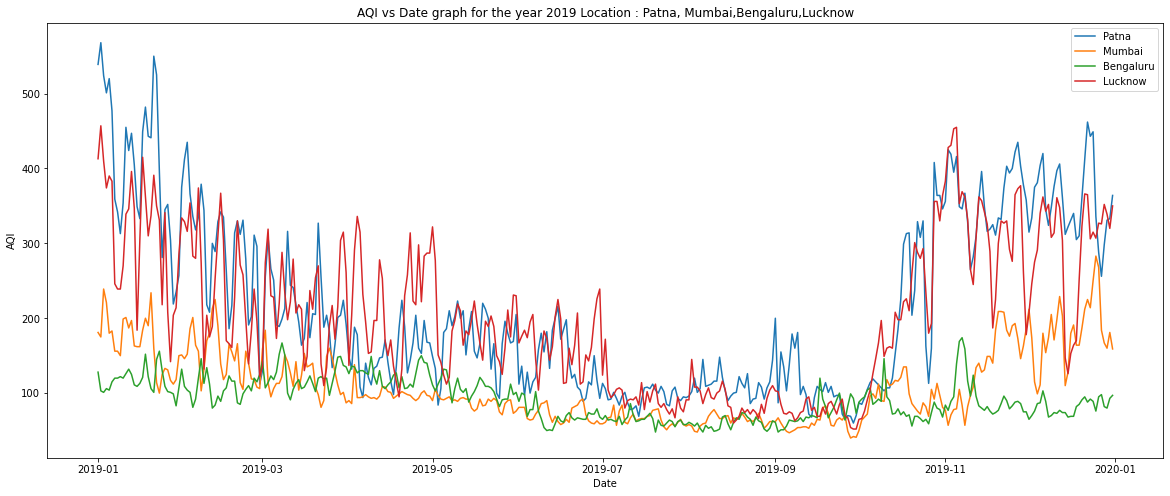

In [36]:

plt.figure(figsize=(20,8))
plt.plot(Patna_2019['Date'],Patna_2019['AQI'])
plt.plot(Mumbai_2019['Date'],Mumbai_2019['AQI'])
plt.plot(Bengaluru_2019['Date'],Bengaluru_2019['AQI'])
plt.plot(Lucknow_2019['Date'],Lucknow_2019['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2019 Location : Patna, Mumbai,Bengaluru,Lucknow")
plt.legend(["Patna", "Mumbai","Bengaluru","Lucknow"])

[]

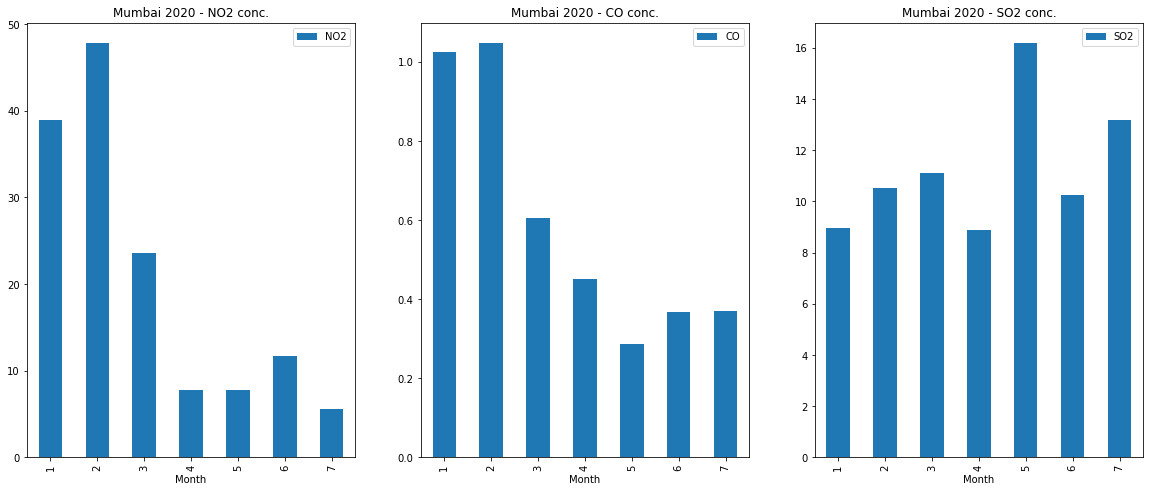

In [43]:

#Plotting the NO2, CO and SO2 concentrations in the city of MUmbai

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Mumbai 2020 - NO2 conc.")
Mumbai_2020.groupby(Mumbai_2020['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Mumbai 2020 - CO conc.")
Mumbai_2020.groupby(Mumbai_2020['Month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Mumbai 2020 - SO2 conc.")
Mumbai_2020 .groupby(Mumbai_2020['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

plt.plot()

<AxesSubplot:title={'center':'Mumbai 2019 - SO2 conc.'}, xlabel='Month'>

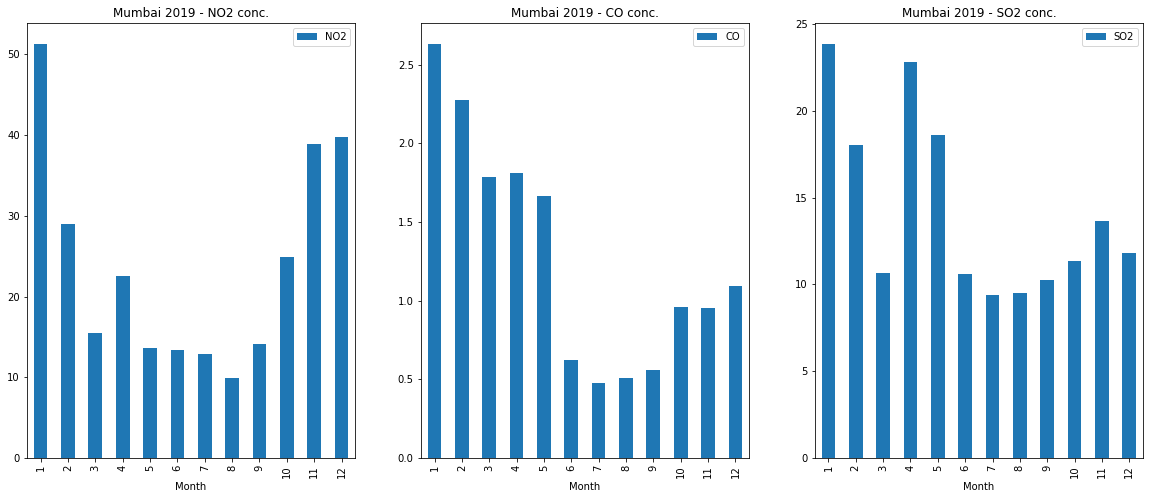

In [45]:
#Plotting the NO2, CO and SO2 concentrations in the city of Mumbai 2019

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Mumbai 2019 - NO2 conc.")
Mumbai_2019.groupby(Mumbai_2019['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax1)
ax2.title.set_text("Mumbai 2019 - CO conc.")
Mumbai_2019.groupby(Mumbai_2019['Month']).mean().plot(y = ['CO'],kind = 'bar',ax = ax2)
ax3.title.set_text("Mumbai 2019 - SO2 conc.")
Mumbai_2019.groupby(Mumbai_2019['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax = ax3)

<AxesSubplot:xlabel='Month'>

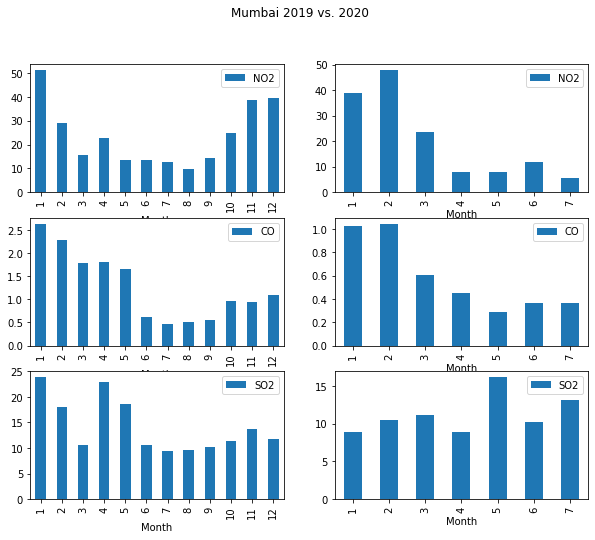

In [47]:
fig,ax = plt.subplots(3,2,figsize = (10,8))
fig.suptitle("Mumbai 2019 vs. 2020")
Mumbai_2019.groupby(Mumbai_2019['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,0])
Mumbai_2020.groupby(Mumbai_2020['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,1])
Mumbai_2019.groupby(Mumbai_2019['Month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,0])
Mumbai_2020.groupby(Mumbai_2020['Month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,1])
Mumbai_2019.groupby(Mumbai_2019['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,0])
Mumbai_2020.groupby(Mumbai_2020['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,1])

<AxesSubplot:xlabel='Month'>

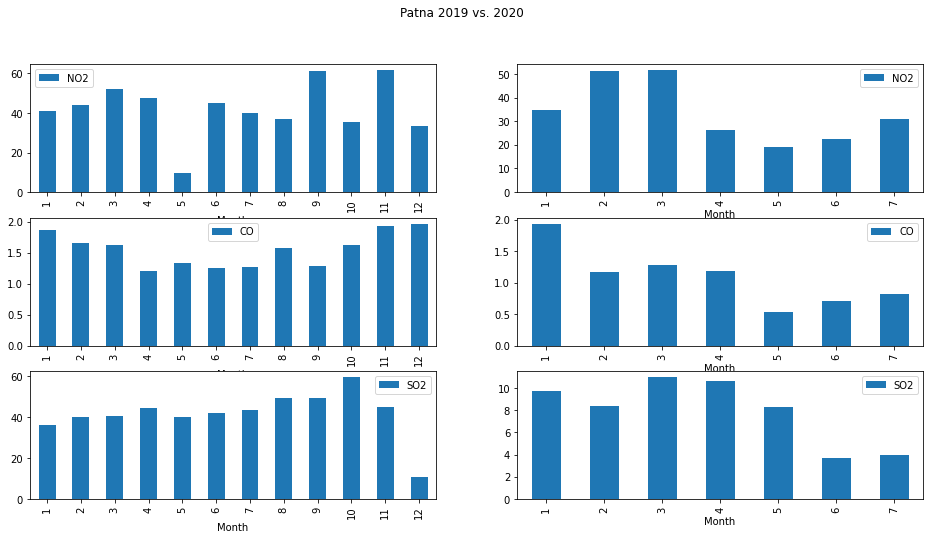

In [50]:
#Comparing the NO2,CO,SO2 concentrations for the city of Patna during the year 2019 and 2020

fig,ax = plt.subplots(3,2,figsize = (16,8))
fig.suptitle("Patna 2019 vs. 2020")
Patna_2019.groupby(Patna_2019['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,0])
Patna_2020.groupby(Patna_2020['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,1])
Patna_2019.groupby(Patna_2019['Month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,0])
Patna_2020.groupby(Patna_2020['Month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,1])
Patna_2019.groupby(Patna_2019['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,0])
Patna_2020.groupby(Patna_2020['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,1])